In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
data_file="MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']

In [3]:
#normalise
std=np.std(X,axis=0,keepdims=True)
Mean = np.mean(X, axis=0, keepdims=True)
Norm_X = (X - Mean) / (std+1e-7)

In [4]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

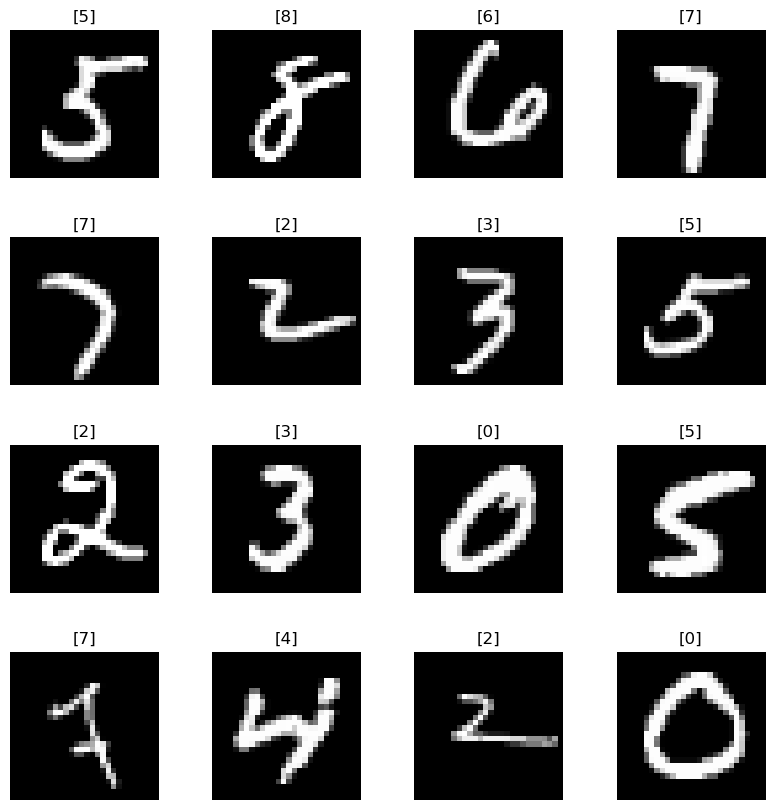

In [5]:
# display a 4x4 grid
import matplotlib.pyplot as plt
import random
indices = random.sample(range(X_train.shape[0]), 16)
sample_images = X_train[indices]
sample_labels = y_train[indices]
sample_images = sample_images.reshape(-1, 28, 28)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()
for i in range(16):
    axes[i].imshow(sample_images[i], cmap='gray')
    axes[i].set_title(str(sample_labels[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
plt.show()


In [6]:
def relu(z):
    relu_z = np.maximum(0, z)
    return relu_z


In [7]:
def softmax(z):
    z_max = np.max(z, axis=1, keepdims=True)
    z_stable = z - z_max
    exp_z = np.exp(z_stable)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [8]:
def init_params(input_size, hidden_size, output_size):
    np.random.seed(2) # for reproducibility
    W1 = np.random.randn(input_size, hidden_size)*0.01
    b1 = np.zeros((hidden_size,1))*0.01
    W2 = np.random.randn(hidden_size, output_size)*0.01
    b2 = np.zeros((output_size,1))*0.01
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters


In [9]:
def forward_prop(X, weights):
    """
    X: input data
    weights: weights of the layers
    returns: logits, output of each layer z1,a1,z2,a2
    """
    W1, b1, W2, b2 = weights["W1"], weights["b1"], weights["W2"], weights["b2"]
    z1 = np.dot(X, W1) + np.transpose(b1)
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + np.transpose(b2)
    a2 = softmax(z2)
    return (z1, a1, z2, a2)


In [10]:
def backward_propg(weights, X, y, outputs, lr):
    (z1,a1,z2,a2)=outputs
    (W1,b1,W2,b2)=weights
    
    N=X.shape[0]
    grad_output2=a2-np.eye(10)[y]
    grad_b2=np.sum(grad_output2, axis=0, keepdims=True).T
    grad_W2=np.dot(a1.T,grad_output2)
    grad_z1=np.dot(grad_output2,W2.T)
    grad_z1=np.where(z1>0, grad_z1, 0)
    grad_b1=np.sum(grad_z1, axis=0, keepdims=True).T
    grad_W1=np.dot(X.T,grad_z1)
    
    # update weights
    W1-=lr*grad_W1
    b1-=lr*grad_b1
    W2-=lr*grad_W2
    b2-=lr*grad_b2
    
    weights = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return weights


In [11]:
def cost_func(weights, y, X):
    (z1,a1,z2,a2)=forward_prop(X, weights)
    prob = softmax(a2)
    N = X.shape[0]
    cost = -np.mean(np.log(np.maximum(a2, 1e-12)))
    return cost


In [12]:
def train(X, y, hidden_nodes, epochs=1000, lr=1e-5):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    # initialize weights.
    weights = init_params(input_size=X.shape[1], hidden_size=hidden_nodes, output_size=10)
    
    for i in range(epochs):
        # forward propagation
        outputs = forward_prop(X, weights)
        
        # print cost at every 100 or so iterations
        if i % 1 == 0:
            cost = cost_func(weights, y, X)
            print("Cost at iteration", i, ":", cost)
        
        # backward propagation
        weights = backward_propg(weights, X, y, outputs, lr)
        
       
    return weights


In [13]:
def predict(X, updated_weights):
    """
    returns the prediction in [0,9] for each element in X
    """
    # unpack weights
    W1, b1, W2, b2 = updated_weights
    
    # forward propogation
    z1 = np.dot(X, W1) + np.transpose(b1)
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + np.transpose(b2)
    a2 = softmax(z2)
    
    # return predictions
    predictions = np.argmax(z2, axis=1)
    return predictions


In [15]:
def accuracy(predictions, y):
    correct = 0
    for i in range(len(predictions)):
        if predictions[i] == y[i]:
            correct += 1
    return correct / len(predictions) * 100


In [ ]:
print(accuracy(predict(X,train(X,y,256)),y))

Cost at iteration 0 : 5.249635054952066


In [ ]:
import pickle
import random

roll_num = "22B1069" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension

# initialize weights
layer_0_wt = np.random.randn(784, hidden_dim)
layer_0_bias = np.random.randn(hidden_dim, 1)
layer_1_wt = np.random.randn(hidden_dim, 10)
layer_1_bias = np.random.randn(10, 1)


model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': (784,256), # layer 0 weight (784, z)
    'layer_0_bias': (256,1), # layer 0 bias (z, 1)
    'layer_1_wt': (256,10), # layer 1 weight (z, 10)
    'layer_1_bias': (10,1) # layer 1 bias (10, 1)
}

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)